In [45]:
import os
from joblib import dump, load
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [54]:
df1 = pd.read_csv('archive/lap_times.csv')
df2 = pd.read_csv('archive/races.csv')

In [55]:
#Eldobjuk a position és az ido oszlopot, és millisecond-al dolgozunk
df1 = df1.drop('time', axis=1)
df1 = df1.drop('position', axis=1)
#Eldobjuk a 2010 előtti versenyeket, mivel 2010be tiltották meg a tankolást,
df2 = df2[df2['year'] > 2009]
#Eldobunk további felesleges oszlopokat
df2 = df2.drop(['round','round','date','time','url','fp1_date','fp1_time',
'fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time', 'sprint_date', 'sprint_time'], axis=1)

In [56]:
merged_df = pd.merge(df1, df2, on='raceId', how='inner')

In [57]:
#Leszűkítjük a keresést Hamiltonra
Ham = merged_df[(merged_df['driverId'] == 1)]

In [58]:
median = Ham['milliseconds'].median()
print(median)
Ham['milliseconds'] = np.where(Ham['milliseconds'] > median, median - 3000, Ham['milliseconds'])

#Kiválasztjuk Monza-t
Ham = Ham[(Ham['circuitId'] == 14)]

92793.0


C:\Users\prokk\AppData\Local\Temp\ipykernel_9464\279433133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ham['milliseconds'] = np.where(Ham['milliseconds'] > median, median - 3000, Ham['milliseconds'])


In [64]:
#Válasszuk ki azokat a változókat, amelyeket a predikcióhoz használunk
X1 = Ham[['raceId', 'lap', 'year']]
y1 = Ham['milliseconds']

#Osszuk fel az adatokat tanító és teszt halmazra
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#Hozzuk létre és tanítsuk be a modelleket
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

#Végezzünk predikciókat a teszt halmazon
y1_pred = model1.predict(X1_test)

#Elmentjük a tanított modelt
if not os.path.exists('models'):
    os.mkdir('models')

dump(model1, 'models/Formula1_LinearRegressionModel.joblib') 

#Számítsuk ki a modell pontosságát
mse1 = mean_squared_error(y1_test, y1_pred)

print(f'MSE for driver 1: {mse1}')

MSE for driver 1: 2677883.6022454933


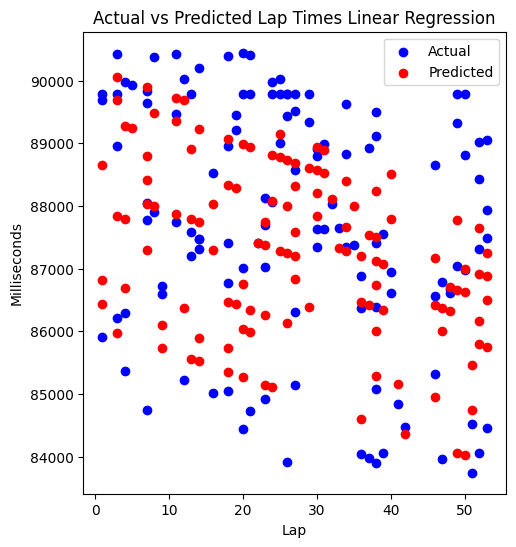

In [67]:
#Az ábra méretének beállítása
plt.figure(figsize=(12, 6))

#Az első subplot létrehozása a driver 1 számára
plt.subplot(1, 2, 1)
plt.scatter(X1_test['lap'], y1_test, color='blue', label='Actual')
plt.scatter(X1_test['lap'], y1_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Lap Times Linear Regression')
plt.xlabel('Lap')
plt.ylabel('Milliseconds')
plt.legend()

#Az ábra megjelenítése
plt.show()